In [1]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
api_key = open('quandlapikey.txt', 'r').read()

In [2]:
df = quandl.get("FMAC/HPI_AK")
df.head()

,NSA Value,SA Value
Date,,
1975-01-31,34.534800,34.726286
1975-02-28,35.037609,35.197119
1975-03-31,35.553993,35.589159
1975-04-30,36.094352,35.972835
1975-05-31,36.687281,36.390458


In [3]:
fiddy_states = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
print(fiddy_states)

[   Name &postal abbreviation[12]                                  \
   Name &postal abbreviation[12] Name &postal abbreviation[12].1   
0                        Alabama                              AL   
1                         Alaska                              AK   
2                        Arizona                              AZ   
3                       Arkansas                              AR   
4                     California                              CA   
5                       Colorado                              CO   
6                    Connecticut                              CT   
7                       Delaware                              DE   
8                        Florida                              FL   
9                        Georgia                              GA   
10                        Hawaii                              HI   
11                         Idaho                              ID   
12                      Illinois               

In [4]:
#fiddy_states = fiddy_states[0][1]
fiddy_states[0].iloc[:, 1]

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: (Name &postal abbreviation[12], Name &postal abbreviation[12].1), dtype: object

In [5]:
for abbv in fiddy_states[0].iloc[:, 1]:
    print("FMAC/HPI_"+str(abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [6]:
api_key = open('quandlapikey.txt','r').read()


main_df = {}

for abbv in fiddy_states[0].iloc[:, 1]:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    main_df['NSA Value' + abbv] = df['NSA Value']
    main_df['SA Value' + abbv] = df['SA Value']
    
main_df = pd.DataFrame(main_df)
print(main_df.head())

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.704806   35.764141    34.534800   34.726286    28.926700   
1975-02-28    35.907316   35.972941    35.037609   35.197119    29.433898   
1975-03-31    36.143665   36.155118    35.553993   35.589159    29.910073   
1975-04-30    36.429987   36.380645    36.094352   35.972835    30.276144   
1975-05-31    36.682771   36.567217    36.687281   36.390458    30.457374   

            SA ValueAZ  NSA ValueAR  SA ValueAR  NSA ValueCA  SA ValueCA  ...  \
Date                                                                      ...   
1975-01-31   28.897320    37.083289   36.981232    15.780799   15.742176  ...   
1975-02-28   29.429073    37.388894   37.286848    15.832694   15.803227  ...   
1975-03-31   29.893710    37.645339   37.542832    16.024521   15.957896  ...   
1975-04-30   30.221104    37.849985   37.762458    16.3

In [7]:
# EXAMPLE WITH PICKLE
# this process I need to do just once and I will have a file in my project folder
pickle_out = open('fiddy_states.pickle', 'wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [8]:
pickle_in = open('fiddy_states.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
print(HPI_data)

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.704806   35.764141    34.534800   34.726286    28.926700   
1975-02-28    35.907316   35.972941    35.037609   35.197119    29.433898   
1975-03-31    36.143665   36.155118    35.553993   35.589159    29.910073   
1975-04-30    36.429987   36.380645    36.094352   35.972835    30.276144   
1975-05-31    36.682771   36.567217    36.687281   36.390458    30.457374   
1975-06-30    36.777865   36.631057    37.326151   36.820520    30.389603   
1975-07-31    36.658069   36.507144    37.967834   37.296973    30.055563   
1975-08-31    36.386625   36.226658    38.555976   37.865643    29.543157   
1975-09-30    36.105965   35.955226    39.068103   38.519704    29.017708   
1975-10-31    35.973711   35.832251    39.526706   39.225618    28.737216   
1975-11-30    36.070626   35.964590    39.931896   39.914015    28.885803   

In [9]:
# EXAMPLE WITH PANDAS calling pickle directly
HPI_data.to_pickle('pickle.pickle')
HPI_data2 = pd.read_pickle('pickle.pickle')

In [10]:
print(HPI_data2)

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.704806   35.764141    34.534800   34.726286    28.926700   
1975-02-28    35.907316   35.972941    35.037609   35.197119    29.433898   
1975-03-31    36.143665   36.155118    35.553993   35.589159    29.910073   
1975-04-30    36.429987   36.380645    36.094352   35.972835    30.276144   
1975-05-31    36.682771   36.567217    36.687281   36.390458    30.457374   
1975-06-30    36.777865   36.631057    37.326151   36.820520    30.389603   
1975-07-31    36.658069   36.507144    37.967834   37.296973    30.055563   
1975-08-31    36.386625   36.226658    38.555976   37.865643    29.543157   
1975-09-30    36.105965   35.955226    39.068103   38.519704    29.017708   
1975-10-31    35.973711   35.832251    39.526706   39.225618    28.737216   
1975-11-30    36.070626   35.964590    39.931896   39.914015    28.885803   

In [11]:
# I will work with HPI_data

HPI_data['NSA ValueTX']

Date
1975-01-31     32.715970
1975-02-28     33.009283
1975-03-31     33.558358
1975-04-30     34.371901
1975-05-31     34.585222
1975-06-30     34.152194
1975-07-31     33.907523
1975-08-31     33.926953
1975-09-30     34.047920
1975-10-31     34.172470
1975-11-30     34.377756
1975-12-31     34.566404
1976-01-31     34.668323
1976-02-29     34.932272
1976-03-31     35.636571
1976-04-30     36.657878
1976-05-31     36.980448
1976-06-30     36.593650
1976-07-31     36.391913
1976-08-31     36.383824
1976-09-30     36.474803
1976-10-31     36.690311
1976-11-30     37.009175
1976-12-31     37.247828
1977-01-31     37.422150
1977-02-28     37.818357
1977-03-31     38.819929
1977-04-30     40.484593
1977-05-31     40.834885
1977-06-30     39.891536
                 ...    
2017-01-31    179.536642
2017-02-28    181.239732
2017-03-31    183.240752
2017-04-30    186.068712
2017-05-31    188.506301
2017-06-30    189.450500
2017-07-31    189.794654
2017-08-31    190.067321
2017-09-30    190.44

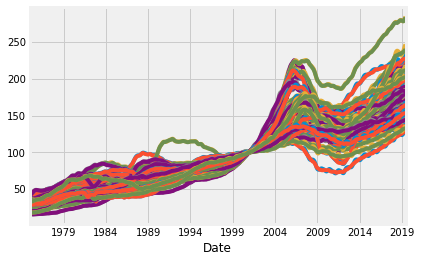

In [12]:
HPI_data.plot()
plt.legend().remove()